# Sympy
Ein Computer Algebra System (CAS) wie Sympy ist in der Lage mit Ausdrücken zu rechnen, in denen Variablen vorkommen.


In [107]:
from sympy import *
init_printing(use_unicode=True)
x, y, z, t = symbols('x y z t')
f, g, h = symbols('f g h', cls=Function)

#### Einen Ausdruck auswerten
Sympy Ausdrücke sind immutable.

In [74]:
z = x*(2*x + y)
print(z)
z1 = z.subs(x,2)
print(z1)
z1 = z.subs([(x,2),(y,3)])   # eine Liste mit Ersetzungtupeln
print(z1)

x*(2*x + y)
2*y + 8
14


#### Gleichheit formulieren

In [77]:
z = Eq(x**2, 9)
print(z)
z

Eq(x**2, 9)


In [82]:
print(solve(z,x))

[-3, 3]


#### Ausdrücke auf Gleichheit testen
Die beste Weg, zwei Ausdrücke auf Gleichheit zu testen, ist zu schauen, ob sich ihre Differenz zu 0 vereinfacht.

In [81]:
z1 = (x + 1)**2
z2 = x**2 + 2*x + 1
print(simplify(z1-z2))

0


#### Brüche
Damit nicht mit floats, sondern mit Bruch-Objekten gerechnet wird, müssen Brüche mit der Funktion Rational erzeugt werden.

In [84]:
z = x + 1/2
print(z)
z = x + Rational(1,2)
print(z)

x + 0.5
x + 1/2


#### Ausmultiplizieren und Ausklammern

In [56]:

expr1 = x*(2*x + y)
expr2 = expand(expr1)    # Ausmultiplizieren
expr3 = factor(expr2)    # Ausklammern
print(expr1)
print(expr2)
print(expr3)

x*(2*x + y)
2*x**2 + x*y
x*(2*x + y)


#### Gleichung lösen

[-sqrt(2), sqrt(2)]


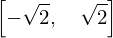

In [64]:
z = solve(x**2 - 2, x)   #  immer = 0
print(z)
z

#### Ableiten

In [55]:
z = diff(sin(x)*exp(x),x)
print(z)
z

exp(x)*sin(x) + exp(x)*cos(x)


#### Aufleiten

In [53]:
z = integrate(exp(x)*sin(x) + exp(x)*cos(x), x) 
print(z)
z

exp(x)*sin(x)


#### Integral berechnen

sqrt(2)*sqrt(pi)/2


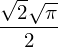

In [52]:
z = integrate(sin(x**2), (x, -oo, oo))
print(z)
z

#### Binomialverteilung

In [47]:
from sympy.stats import Binomial, density, P
X = Binomial('X', 4, S.Half)  
tabelle = density(X).dict 
print(tabelle)
print(P(X>2))
print(P(X<=1))
print(P(Eq(X,2)))

{0: 1/16, 1: 1/4, 2: 3/8, 3: 1/4, 4: 1/16}
5/16
5/16
3/8


#### Grenzwert berechnen

In [59]:
z = limit(sin(x)/x, x, 0)
print(z)

1


#### Strings in einen Sympy-Ausdruck umwandeln

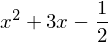

In [86]:
s = "x**2 + 3*x - 1/2"
z = sympify(s)
z

#### Einen symbolischen Ausdruck in eine Gleitkommazahl auswerten

In [97]:
x = sqrt(2)
z = x.evalf()
z1 = x.evalf(5)    # Anzahl Ziffern
print(x,type(z),z,z1)

sqrt(2) <class 'sympy.core.numbers.Float'> 1.41421356237310 1.4142


In [98]:
pi.evalf(100)

#### In einem Ausdruck eine Variable ersetzen und dann numerisch auswerten.

In [101]:
z = cos(2*x)
z.evalf(4,subs={x : 2*pi})

#### Einen Ausdruck an vielen Stellen auswerten: lambdify
Dafür ist sympy nicht optimal, scipy oder numpy sind dafür besser.

In [109]:
import numpy
a = numpy.arange(10)  # array von 0 - 9
z = sin(x)
f = lambdify(x, z, "numpy")  
f(a)

array([ 0.        ,  0.84147098,  0.90929743,  0.14112001, -0.7568025 ,
       -0.95892427, -0.2794155 ,  0.6569866 ,  0.98935825,  0.41211849])

In [113]:
import math            # es geht auch das Modul math
f = lambdify(x, z, "math")
print(f(0.1))
 

0.09983341664682815


#### Einfaches Plotten mit plot.py (Weitz)

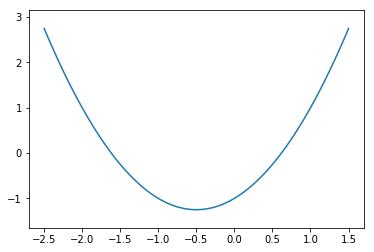

In [123]:
from plot import *
plotFunc2D(lambda x: x*x + x - 1, [-2.5, 1.5])


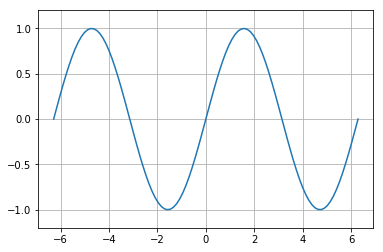

In [122]:
plotFunc2D(sin, [-2*math.pi,2*math.pi],grid=True)